In [32]:
%reload_ext autoreload
%autoreload 2
from airplane_system import AirplaneSystem
import numpy as np
from proj_helpers import *
from rrt import *
import time
from IPython.display import HTML

In [106]:
# 6D state (x, z, V, gamma, theta, q)
x0 = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane = AirplaneSystem()
input_trajectory, state_trajectory_approx, time_array = airplane.trajOpt(x0, dircol=0, second_pass=False)
# input_trajectory_2, state_trajectory_approx_2, time_array_2 = airplane.trajOpt(x0, dircol=1, second_pass=True)


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 11.3 seconds **

t_f computed: 16.667 seconds
cost computed: 3108.372


computing TVLQR along trajectory
finer dynamics simulated


<IPython.core.display.Javascript object>


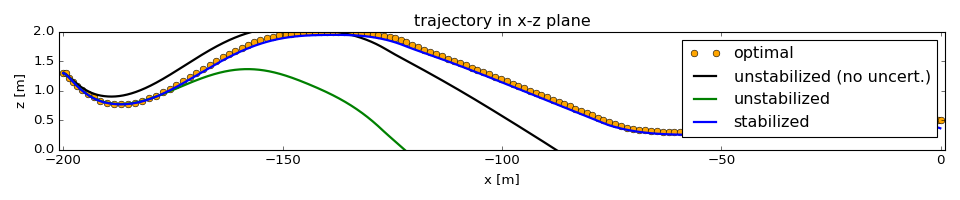

<IPython.core.display.Javascript object>


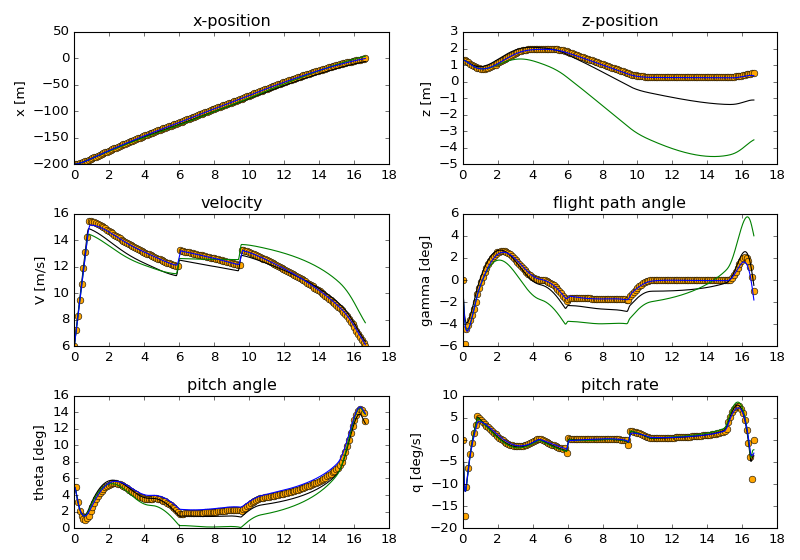

<IPython.core.display.Javascript object>


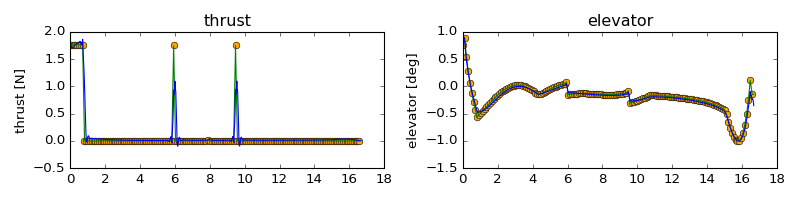

In [104]:
trajplot = simAndCompare(airplane, x0, compare=True)
trajplot.show()

In [5]:
knots_full = range(len(airplane.ttraj)-1)
t0 = time.time()
rho_full = getRho(airplane, knots_full, False)
t1 = time.time()
print('sweep finished in %.2f seconds' % (t1-t0))

i:  0 , knot:  0 , rho:  0.0480541992188
i:  1 , knot:  1 , rho:  0.04271484375
i:  2 , knot:  2 , rho:  0.0405457305908
i:  3 , knot:  3 , rho:  0.0304092979431
i:  4 , knot:  4 , rho:  0.03796875
i:  5 , knot:  5 , rho:  0.0360406494141
i:  6 , knot:  6 , rho:  0.03796875
i:  7 , knot:  7 , rho:  0.0320361328125
i:  8 , knot:  8 , rho:  0.0360406494141
i:  9 , knot:  9 , rho:  0.0284765625
i:  10 , knot:  10 , rho:  0.0456139469147
i:  11 , knot:  11 , rho:  0.0304092979431
i:  12 , knot:  12 , rho:  0.04271484375
i:  13 , knot:  13 , rho:  0.03375
i:  14 , knot:  14 , rho:  0.0304092979431
i:  15 , knot:  15 , rho:  0.03796875
i:  16 , knot:  16 , rho:  0.0284765625
i:  17 , knot:  17 , rho:  0.0320361328125
i:  18 , knot:  18 , rho:  0.0304092979431
i:  19 , knot:  19 , rho:  0.0320361328125
i:  20 , knot:  20 , rho:  0.0320361328125
i:  21 , knot:  21 , rho:  0.0405457305908
i:  22 , knot:  22 , rho:  0.0360406494141
i:  23 , knot:  23 , rho:  0.0304092979431
i:  24 , knot:  24 , 

In [107]:
funnelplot = plotTrajFunnel(airplane, rho_full, knots_full)
funnelplot.legend(('nominal', 'stabilized', 'unstabilized', 'unstabilized (no uncert.)'))
funnelplot.savefig('figs/funnel_traj1.png', dpi=300)
funnelplot.show()

<IPython.core.display.Javascript object>

TypeError: 'NoneType' object has no attribute '__getitem__'

In [99]:
horizontal_starts = np.arange(0,151,5)
x0_sweep = np.zeros((horizontal_starts.shape[0], x0.shape[0]))
sys_sweep = []

for i, start in enumerate(horizontal_starts):
    x0_sweep[i,:] = x0
    x0_sweep[i,0] = start
    if np.mod(i, 2) == 0:
        x0_sweep[i,1] = x0[1] - 0.5

    sys = AirplaneSystem()
    utraj, xtraj, ttraj = sys.trajOpt(x0_sweep[i,:], dircol=0, second_pass=False)
    sys_sweep.append(sys)
    print 'i: ', i, ', tf: ', ttraj[-1]


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.4 seconds **

t_f computed: 16.667 seconds
cost computed: 3243.994
i:  0 , tf:  16.6666666667
Number of decision vars 1255
** solver begin with N = 156 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 12.0 seconds **

t_f computed: 16.250 seconds
cost computed: 2949.080
i:  1 , tf:  16.25
Number of decision vars 1223
** solver begin with N = 152 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.0 seconds **

t_f computed: 15.833 seconds
cost computed: 2899.850
i:  2 , tf:  15.8333333333
Number of decision vars 1191
** solver begin with N = 148 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.7 seconds **

t_f computed: 15.417 seconds
cost computed: 2647.841
i:  3 , tf:  15.4166666667
Number of decision vars 1159
** solver begin with N = 144 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 10.4 seconds **

t_f compute

<IPython.core.display.Javascript object>


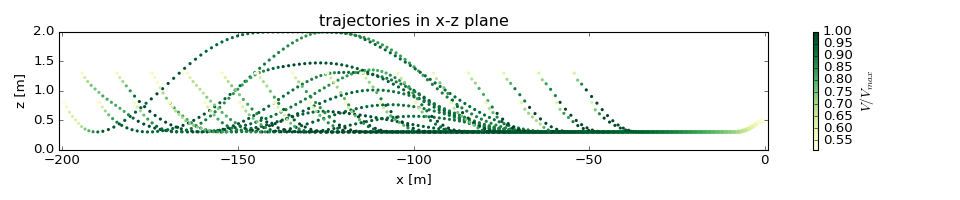

In [100]:
plotMultipleTraj(sys_sweep)

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


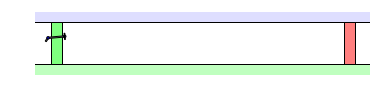

In [79]:
viz = urdfViz(airplane)
viz.save('figs/urdfViz.mp4', dpi=300)
# plt.close()
# HTML(viz.to_html5_video())

<IPython.core.display.Javascript object>


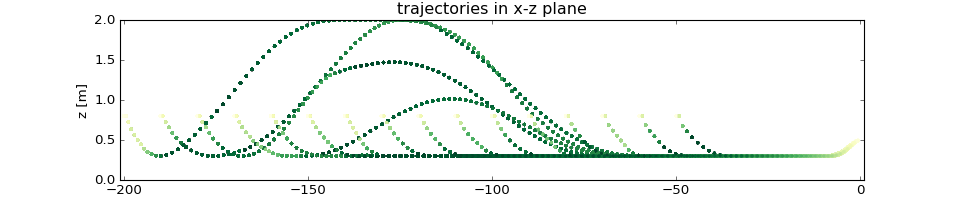

In [102]:
%matplotlib nbagg
animateMultipleTraj(sys_sweep[0::2], saveprefix='figs/even_step')

In [44]:
# do a simple RRT with obstacles
obs = np.array([[-100, 0, 10, 1.0], [-30, 0, 10, 1.0], [-160, 1.0, 10, 1.0]])
x0_rrt = np.array([-200.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
xg_rrt = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane_rrt = AirplaneSystem()
rrt = RRT(x0_rrt, xg_rrt, airplane_rrt, obs)
nodes = rrt.run()

Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.5 seconds **

t_f computed: 16.667 seconds
cost computed: 3130.152
goal reachable from start but not obstacle free
i:  0
Number of decision vars 591
** solver begin with N = 73 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.6 seconds **

t_f computed: 20.561 seconds
cost computed: 3519.741
i:  1
Number of decision vars 831
** solver begin with N = 103 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.4 seconds **

t_f computed: 10.691 seconds
cost computed: 1506.150
i:  2
Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 6.813 seconds
cost computed: 1420.254
Number of decision vars 639
** solver begin with N = 79 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 8.923 seconds
cost computed: 2.888
i:  3


In [45]:
urrt, xrrt, trrt = rrt.reconstruct_path()

Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.273 seconds
cost computed: 12.789
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 9.478 seconds
cost computed: 595.381
Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 6.813 seconds
cost computed: 1420.254


finer dynamics simulated


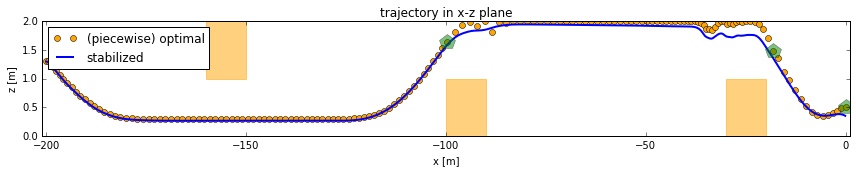

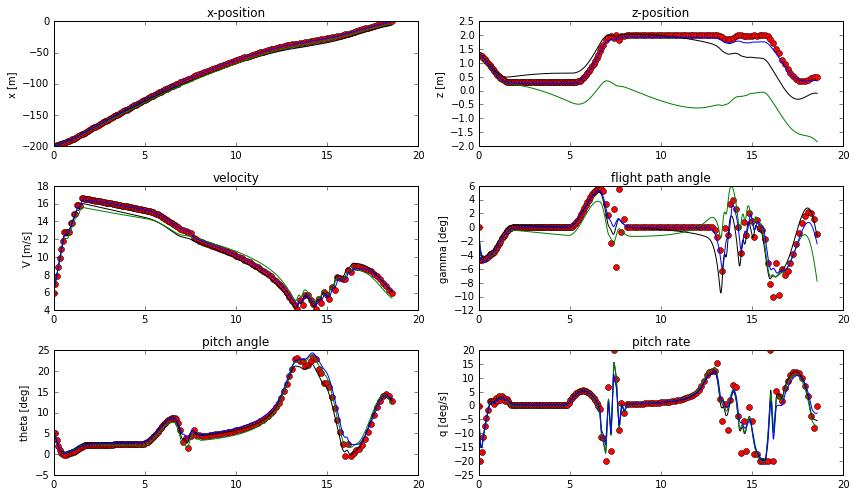

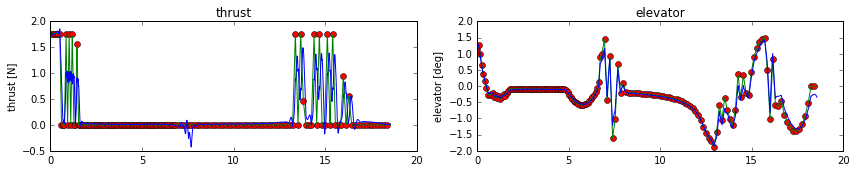

In [89]:
trajplot_rrt = simAndCompare(rrt.plant, x0_rrt, obs=obs, goalnode=rrt.nodes[-1], compare=True)
trajplot_rrt.tight_layout()
trajplot_rrt.show()

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


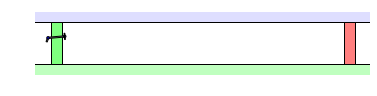

In [78]:
viz = urdfViz(rrt.plant)
plt.close()
HTML(viz.to_html5_video())